# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data. The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

**Import numpy and pandas**

In [198]:
import numpy as np
import pandas as pd

**Import visualization libraries and set %matplotlib inline.**

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read in the csv file as a dataframe called df**

In [200]:
df=pd.read_csv('/content/911.csv')

**Check the info() of the df**

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Check the head of df**

In [202]:
df.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [203]:
top=df['zip'].value_counts().head(5)
print(top)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64


**What are the top 5 townships (twp) for 911 calls?**

In [204]:
print(f'{df["twp"].value_counts().head(5)}')


twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64


**Take a look at the 'title' column, how many unique title codes are there?**

In [205]:
print(f" {df['title'].nunique()}")


 110


## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [206]:
df['reasons']=df['title'].apply(lambda x: x.split(':')[0])
print(df['reasons'])

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: reasons, Length: 99492, dtype: object


**What is the most common Reason for a 911 call based off of this new column?**

In [207]:
common=df['reasons'].value_counts().head(1)
print(common)

reasons
EMS    48877
Name: count, dtype: int64


**Now use seaborn to create a countplot of 911 calls by Reason.**

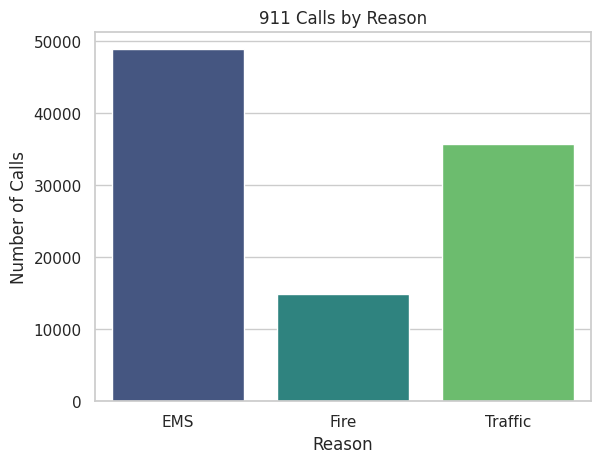

In [263]:

plt.figure()
sns.countplot(data=df, x='reasons', hue='reasons',palette='viridis')
plt.title('911 Calls by Reason')
plt.xlabel('Reason')
plt.ylabel('Number of Calls')
plt.show()

EMS has high no. of 911 calls

Traffic is the second most common reason

fire has the fewest

**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [209]:
print(f"{df['timeStamp'].dtype}")


object


**You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [210]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])
print(f"{df['timeStamp'].dtype}")

datetime64[ns]


**You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [211]:
df['hour']=df['timeStamp'].apply(lambda x: x.hour)
df['month']=df['timeStamp'].apply(lambda x: x.month)
df['day of week']=df['timeStamp'].apply(lambda x: x.dayofweek)

**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [212]:
print(df['day of week'])

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: day of week, Length: 99492, dtype: int64


In [213]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day of week']=df['day of week'].map(dmap)
print(df['day of week'])

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: day of week, Length: 99492, dtype: object


**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

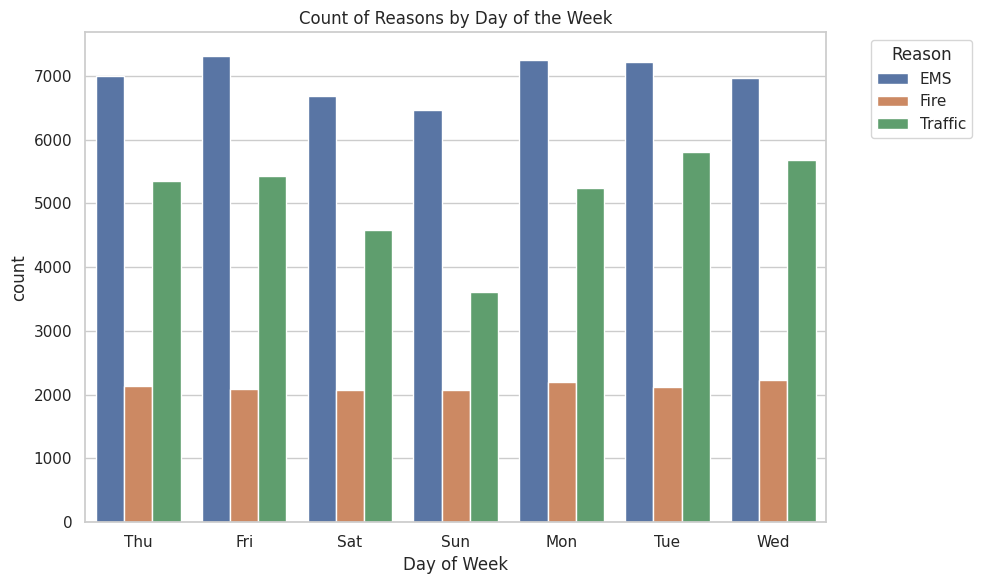

In [214]:

sns.set(style='whitegrid')


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day of week', hue='reasons')

plt.title('Count of Reasons by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('count')
plt.legend(title='Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

EMS calls dominate 911 services eveyday

traffic calls are week day heavy

fire calls are stable and don't depend much on the day of the week

**Now do the same for Month:**

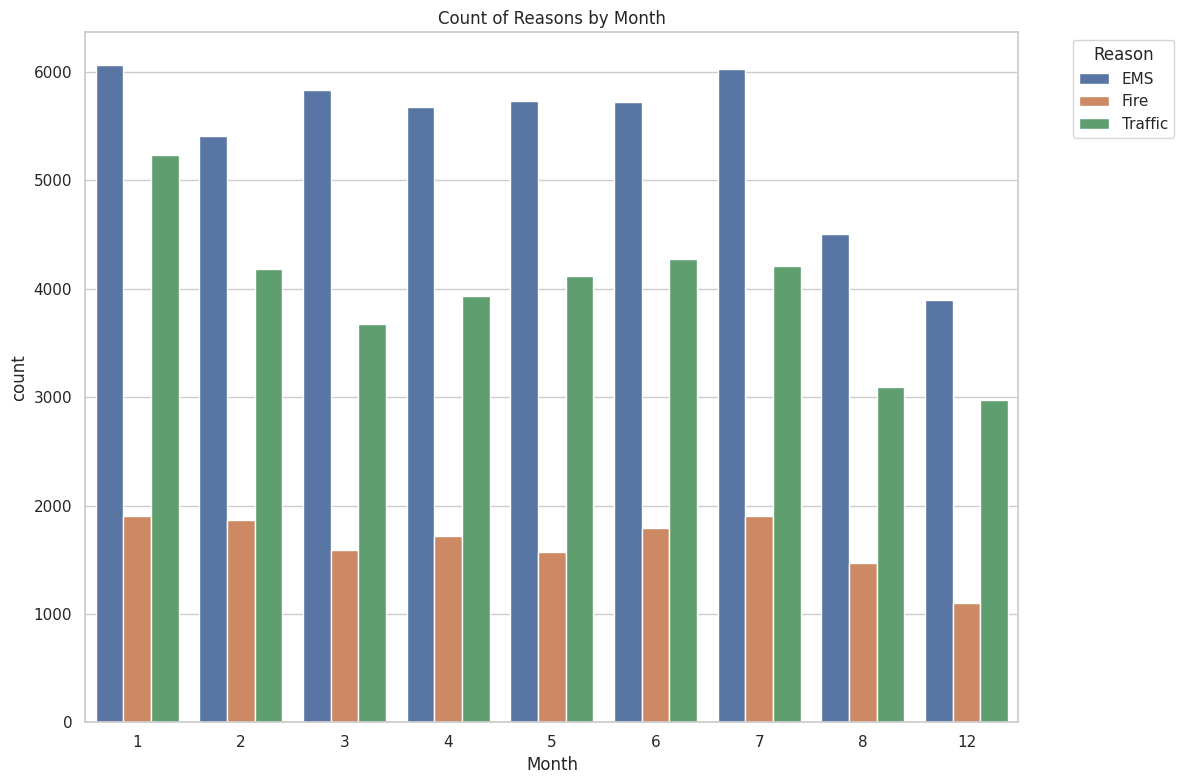

In [215]:

sns.set(style='whitegrid')

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='month', hue='reasons')

plt.title('Count of Reasons by Month')
plt.xlabel('Month')
plt.ylabel('count')
plt.legend(title='Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

EMS calls dominate regardless of month

Traffic related 911 calls fluctate more based on seasons or driving patterns

fire related calls are less frequent

**Did you notice something strange about the Plot?**

some months are missing

**You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [216]:

byMonth = df.groupby('month').count()
print(byMonth.head(12))

         lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
month                                                                      
1      13205  13205  13205  11527  13205      13205  13203  13096  13205   
2      11467  11467  11467   9930  11467      11467  11465  11396  11467   
3      11101  11101  11101   9755  11101      11101  11092  11059  11101   
4      11326  11326  11326   9895  11326      11326  11323  11283  11326   
5      11423  11423  11423   9946  11423      11423  11420  11378  11423   
6      11786  11786  11786  10212  11786      11786  11777  11732  11786   
7      12137  12137  12137  10633  12137      12137  12133  12088  12137   
8       9078   9078   9078   7832   9078       9078   9073   9025   9078   
12      7969   7969   7969   6907   7969       7969   7963   7916   7969   

       reasons   hour  day of week  
month                               
1        13205  13205        13205  
2        11467  11467        11467  
3        11101 

**Now create a simple plot off of the dataframe indicating the count of calls per month.**

month
1     13205
2     11467
3     11101
4     11326
5     11423
6     11786
7     12137
8      9078
12     7969
dtype: int64


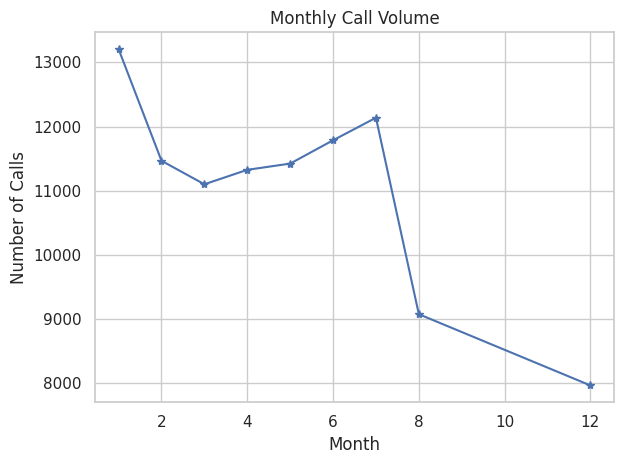

In [256]:
byMonth = df.groupby('month').size()
byMonth.plot(kind='line', marker='*', title='Monthly Call Volume')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.tight_layout()
plt.show()


January (Month 1) has the highest volume — over 13,000 calls.

From February to July, call volume stays relatively stable between 11,000–12,000.

Sharp drop in August (Month 8) — drops to around 9,000 calls.

Declining trend continues to December, ending below 8,000 calls

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

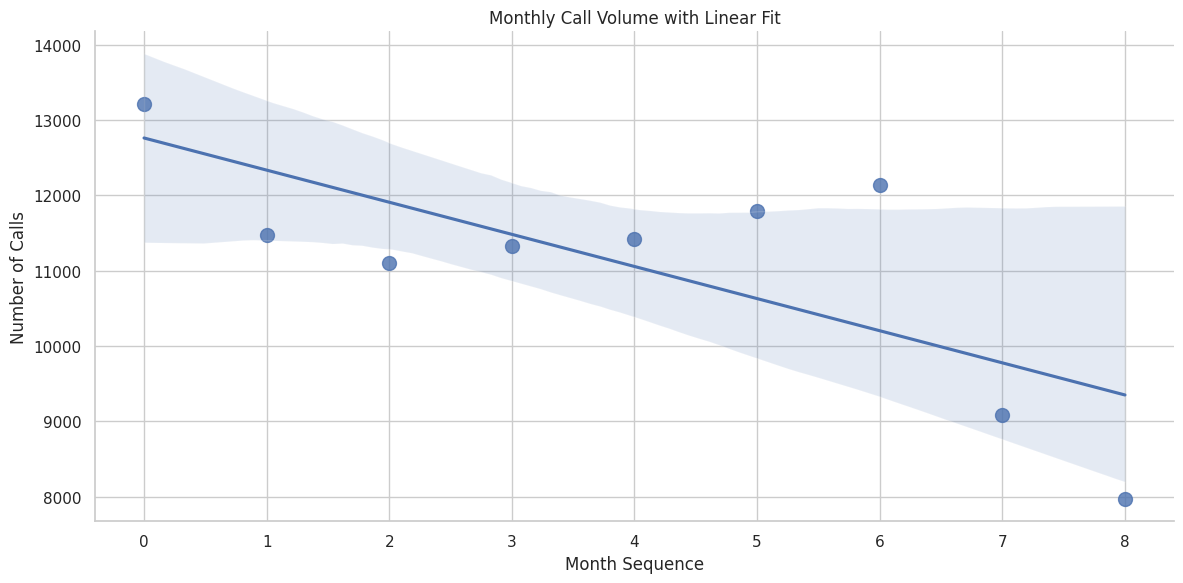

In [254]:

bymonth = df.groupby('month').size().reset_index(name='calls')
bymonth['month_sequence'] = range(len(byMonth))
sns.lmplot(
    x='month_sequence',
    y='calls',
    data=bymonth,
    scatter_kws={'marker': '*', 's': 100},
    height=6,
    aspect=2
)
plt.title('Monthly Call Volume with Linear Fit')
plt.xlabel('Month Sequence')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.tight_layout()
plt.show()

There's a negative linear relationship between month and number of 911 calls in this dataset.

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.**

In [219]:
df['date'] = df['timeStamp'].apply(lambda x: x.date())
print(df['date'])

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: date, Length: 99492, dtype: object


**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

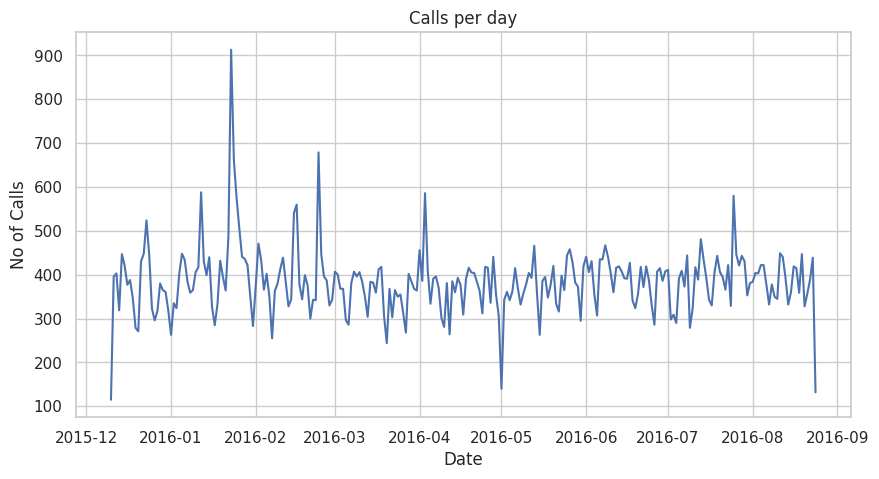

In [220]:
calls = df.groupby('date')['title'].count()
calls.plot(figsize=(10,5))
plt.title('Calls per day')
plt.xlabel('Date')
plt.ylabel('No of Calls')
plt.show()

Call Volume is Generally Stable
Most days have around 300–500 calls.

Some Days Have Sudden Spikes
A few days have over 900 calls — these may be due to emergencies or special events.

Occasional Dips in Data
A few days show very low call counts — possibly due to missing data or system issues.

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

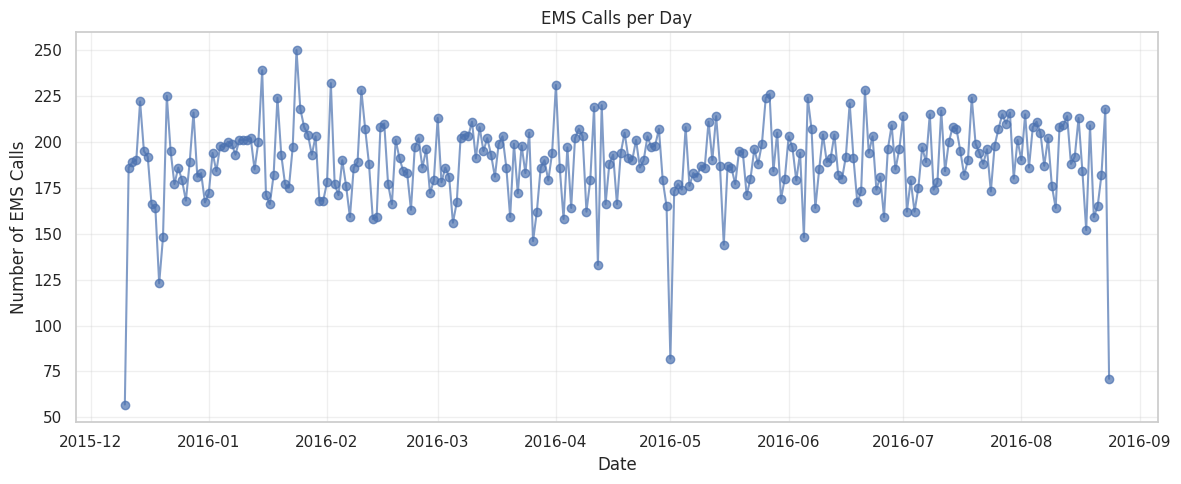

In [221]:
ems_df = df[df['reasons'] == 'EMS']

# Group by date and count
ems_calls = ems_df.groupby('date')['title'].count()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(ems_calls.index, ems_calls.values, marker='o', linestyle='-', alpha=0.7)
plt.title('EMS Calls per Day')
plt.xlabel('Date')
plt.ylabel('Number of EMS Calls')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

 EMS Calls Are Fairly Consistent
Most days show 170–210 calls, showing steady demand for emergency medical services.

Few Sudden Drops
Some days have very low counts (below 100), which may indicate data gaps or reporting issues.

Occasional High Peaks
Certain days exceed 230–250 calls — likely due to major incidents or public events.



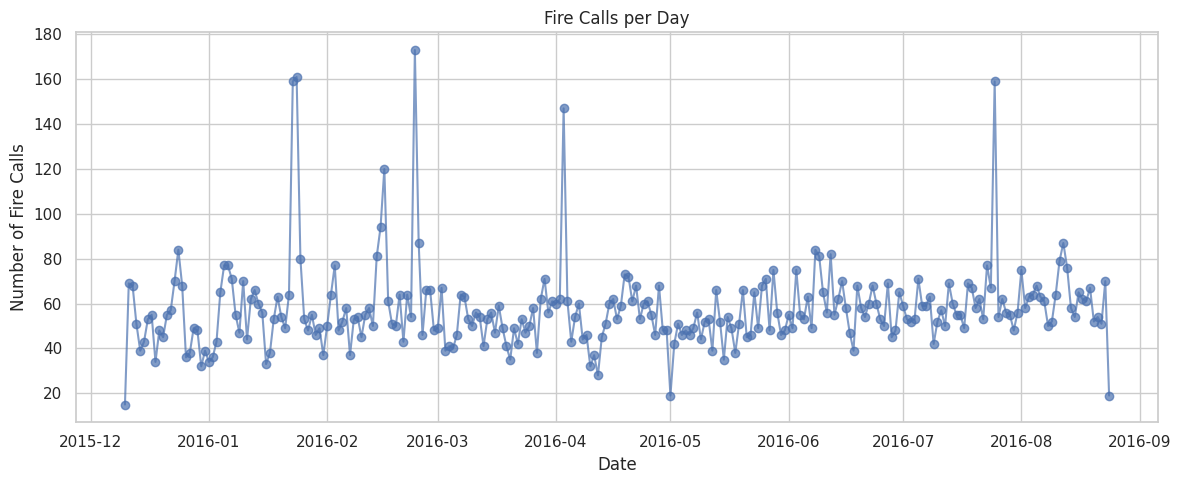

In [223]:
fi_df = df[df['reasons'] == 'Fire']

# Group by date and count
fi_calls = fi_df.groupby('date')['title'].count()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(fi_calls.index, fi_calls.values, marker='o', linestyle='-', alpha=0.7)
plt.title('Fire Calls per Day')
plt.xlabel('Date')
plt.ylabel('Number of Fire Calls')
plt.grid(True)
plt.tight_layout()
plt.show()

Average Daily Fire Calls: ~40–60
Most days had moderate fire activity, staying within this consistent range.

Significant Spikes Detected
Multiple extreme peaks (e.g., 160–175 calls/day) likely reflect major fire incidents or emergencies.

No Strong Trend Over Time
Like EMS, fire calls remained relatively stable from Dec 2015 to Aug 2016.

Sudden Drops
A few days show very low counts (15–20 calls) — possibly data entry issues or quiet days.

Random Highs Spread Across Months
Peaks appear in January, March, April, and July, indicating no fixed seasonal pattern.



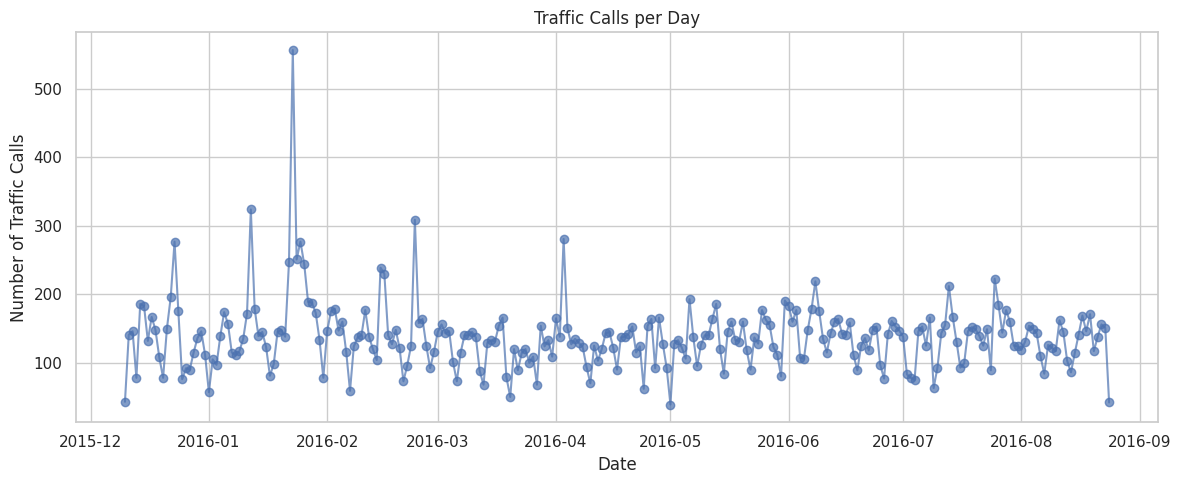

In [224]:
tr_df = df[df['reasons'] == 'Traffic']

# Group by date and count
tr_calls = tr_df.groupby('date')['title'].count()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(tr_calls.index, tr_calls.values, marker='o', linestyle='-', alpha=0.7)
plt.title('Traffic Calls per Day')
plt.xlabel('Date')
plt.ylabel('Number of Traffic Calls')
plt.grid(True)
plt.tight_layout()
plt.show()

Average Daily Fire Calls: 40–60
Most days had moderate fire activity, staying within this consistent range.

Significant Spikes Detected
Multiple extreme peaks (e.g., 160–175 calls/day) likely reflect major fire incidents or emergencies.

No Strong Trend Over Time
Like EMS, fire calls remained relatively stable from Dec 2015 to Aug 2016.

Sudden Drops
A few days show very low counts (15–20 calls) — possibly data entry issues or quiet days.

Random Highs Spread Across Months
Peaks appear in January, March, April, and July, indicating no fixed seasonal pattern.

**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [227]:
calls_by_day_hour = df.groupby(['day of week', 'hour']).count()['title'].unstack()


**Now create a HeatMap using this new DataFrame.**

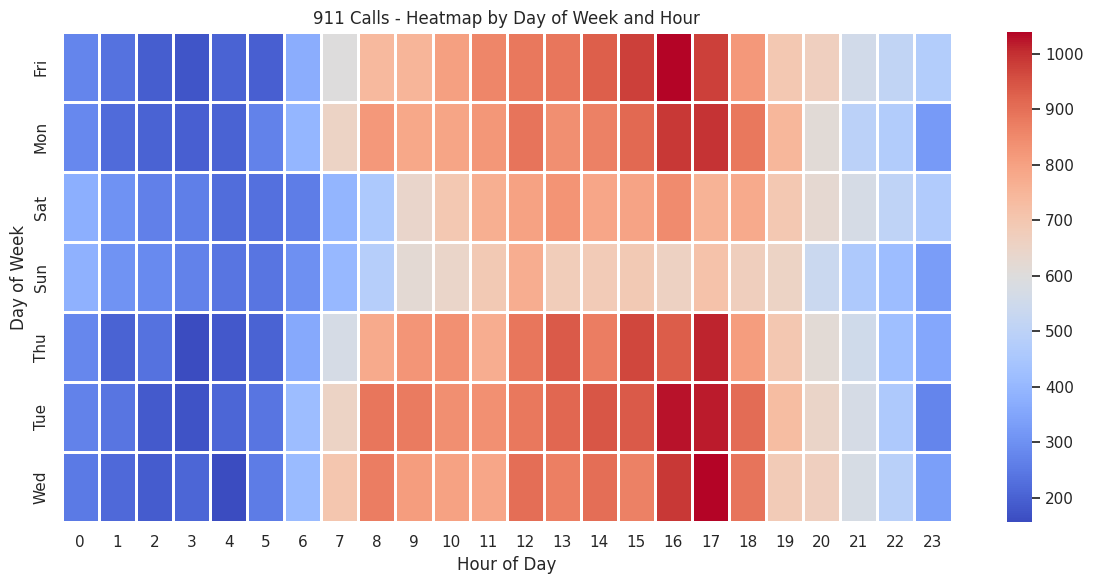

In [243]:
plt.figure(figsize=(12, 6))
sns.heatmap(calls_by_day_hour, cmap='coolwarm', linewidths=1)
plt.title('911 Calls - Heatmap by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

Peak Hours: 3 PM – 6 PM
This is the busiest time across all days, with the highest activity at 5 PM.

Quiet Hours: 12 AM – 6 AM
Very low call volume during these early morning hours — likely due to people sleeping.

Most Active Weekdays: Wed & Tue

Wednesday shows the highest intensity during peak hours.

Tuesday and Thursday are also consistently busy.

Weekends Are Calmer

Saturday and Sunday show a lower density of calls during peak times.

This may reflect reduced work-related or traffic incidents.

Consistent Daily Pattern
The pattern is regular across days: low in the morning → rising mid-day → peak in late afternoon → drop at night.



**Now create a clustermap using this DataFrame.**

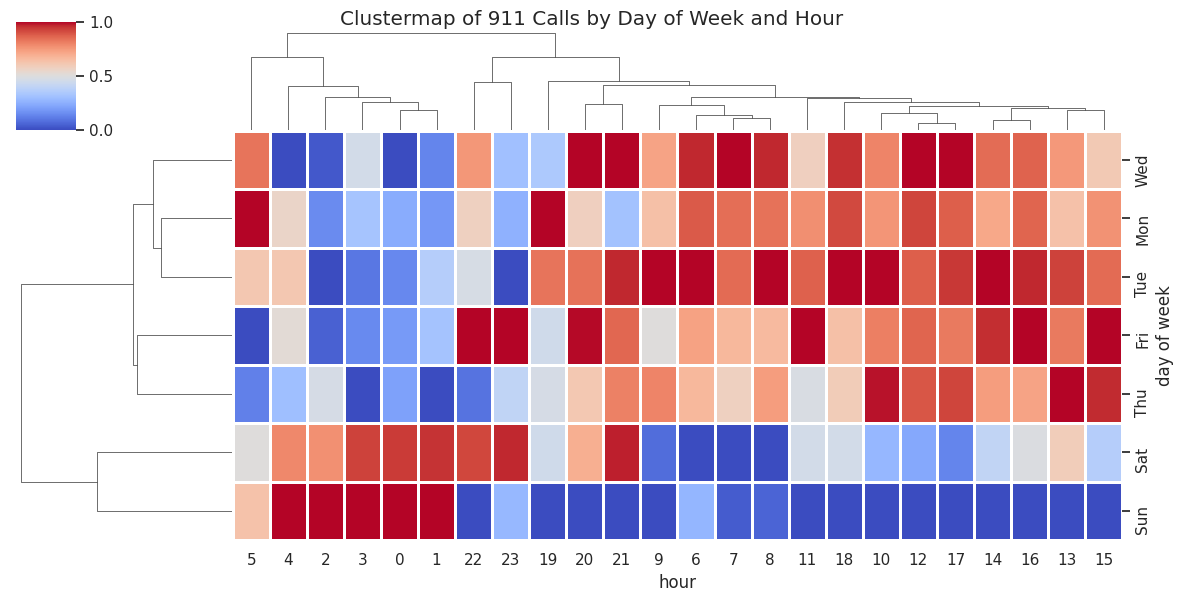

In [246]:
sns.clustermap(calls_by_day_hour,
               cmap='coolwarm',
               linewidths=1,
               figsize=(12, 6),
               standard_scale=1)  # Normalize data by columns

plt.suptitle('Clustermap of 911 Calls by Day of Week and Hour', y=1)
plt.show()

Most 911 calls happen during the daytime (from 6 AM to 8 PM)

Late-night and early-morning hours (12 AM to 5 AM) have the fewest calls

Weekends (Saturday & Sunday) show lower activity overall

Peak call hours seem to be around:Morning (6 AM to 11 AM),Evening (4 PM to 8 PM) on weekdays

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [248]:
calls_by_day_month = df.groupby(['day of week', 'month']).count()['title'].unstack()

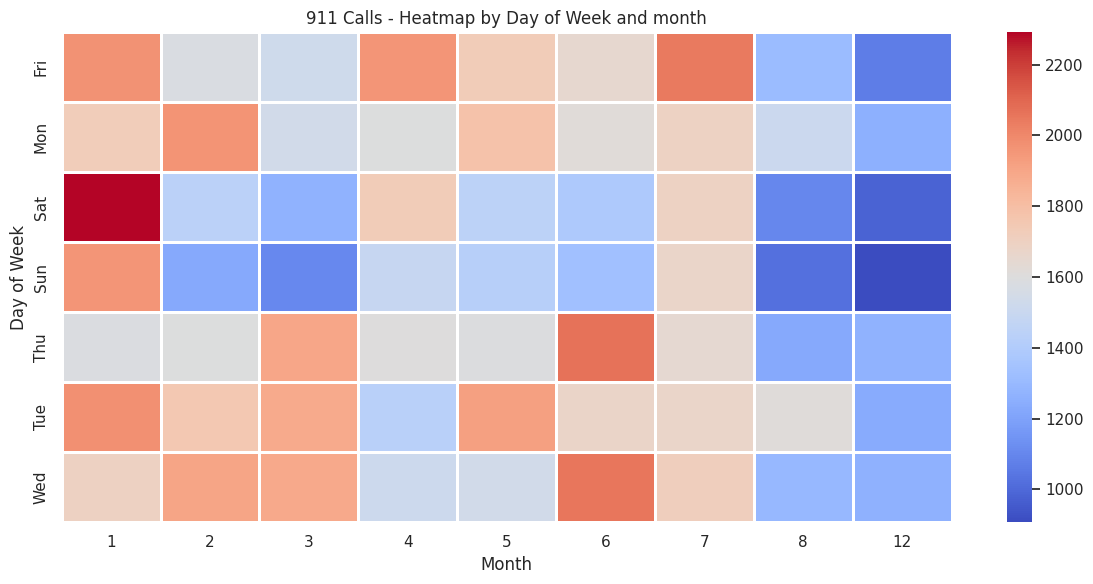

In [249]:
plt.figure(figsize=(12, 6))
sns.heatmap(calls_by_day_month, cmap='coolwarm', linewidths=1)
plt.title('911 Calls - Heatmap by Day of Week and month')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

Highest 911 Call Volume:
Saturday in January is the busiest day-month combination.

Lower Call Volumes:
Across December and August, call volumes are generally lower on most days
Sunday in December has the least number of calls

Months with Generally Higher Calls:
January, February, and June have more red/orange shades, indicating higher call activity.

Possibly due to seasonal effects, holidays, or weather conditions (e.g., winter in Jan/Feb, summer in June).

Consistent Mid-level Activity:

Tuesdays and Wednesdays show fairly steady call numbers throughout the months, mostly orange/light red.

Weekends (Sat & Sun):

More variation in call volume, from high



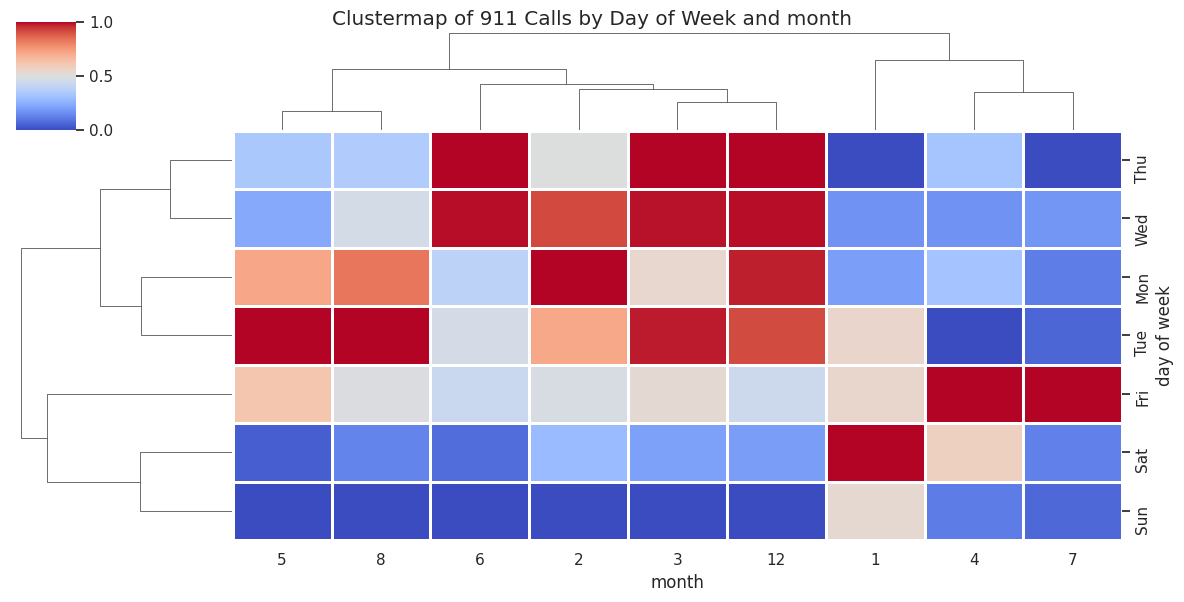

In [250]:
sns.clustermap(calls_by_day_month,
               cmap='coolwarm',
               linewidths=1,
               figsize=(12, 6),
               standard_scale=1)

plt.suptitle('Clustermap of 911 Calls by Day of Week and month', y=1)
plt.show()

Sunday and Saturday are grouped together — they behave similarly with fewer calls.

Monday to Thursday form another cluster — showing higher and more consistent call patterns.

Fridays sit in between both clusters — sometimes acting like a weekday, sometimes like a weekend.